<a href="https://colab.research.google.com/github/UERJ-FISICA/Fisica-Geral/blob/main/Aula02_Estimativa_Comprimento_mesa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
!curl -o Atividades-Aula01-Comprimento-mesa.xlsx https://raw.githubusercontent.com/UERJ-FISICA/Fisica-Geral/main/dados/Atividades-Aula01-Comprimento-mesa.xlsx

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 15829  100 15829    0     0   281k      0 --:--:-- --:--:-- --:--:--  281k


In [3]:
# array_L = np.array( [ 149.81, 149.9 , 150.1 , 150.5 , 149.8 , 149.8 , 149.71, 150.21,
#                       149.75, 150.1 , 150.15, 150.1 , 150.  , 150.4 , 149.91, 150.1 ,
#                       150.09, 150. ] )
df = pd.read_excel( "Atividades-Aula01-Comprimento-mesa.xlsx", sheet_name="Comprimento mesa", usecols=[0], nrows=18, names=["L"] )
df

,L
0,149.81
1,149.90
2,150.10
3,150.50
4,149.80
5,149.80
6,149.71
7,150.21
8,149.75
9,150.10


In [4]:
#array_L = df.iloc[:, 0]
array_L = df[ "L" ]
array_L

0     149.81
1     149.90
2     150.10
3     150.50
4     149.80
5     149.80
6     149.71
7     150.21
8     149.75
9     150.10
10    150.15
11    150.10
12    150.00
13    150.40
14    149.91
15    150.10
16    150.09
17    150.00
Name: L, dtype: float64

Desvio padrão populacional:

In [5]:
media_L = np.mean( array_L )
print ( "Média (cm) = {}".format( media_L ) )

var_L_p = np.mean( array_L ** 2 ) - np.mean( array_L ) ** 2
print ( "Variância populacional (cm²) = {}".format( var_L_p ) )

Média (cm) = 150.02388888888888
Variância populacional (cm²) = 0.04417932099386235


In [6]:
sigma_L_p = np.sqrt( var_L_p )
print ( "Desvio padrão populacional (cm) = {}".format( sigma_L_p ) )

Desvio padrão populacional (cm) = 0.21018877466187946


In [7]:
np.std( array_L, ddof=0 )

0.21018877464711025

Desvio padrão amostral:

In [8]:
N = array_L.size # tamanho da sequência L
print ( "N = {}".format( N ) )

sigma_L_a = np.sqrt( N / (N - 1) ) * sigma_L_p
print ( "Desvio padrão amostral (cm) = {}".format( sigma_L_a ) )

N = 18
Desvio padrão amostral (cm) = 0.21628246480409966


In [9]:
np.std( array_L, ddof=1 )

0.21628246478890223

Erro da média:

In [10]:
erro_media_L = sigma_L_a / np.sqrt( N )
print ( "Erro da média (cm) = {}".format( erro_media_L ) )

Erro da média (cm) = 0.05097826583823989


Estimativa do comprimento das mesas:

In [11]:
print ( "L = {:.2f} ± {:.2f} (cm)".format( np.round( media_L, 2 ), np.round( erro_media_L, 2 ) ) )

L = 150.02 ± 0.05 (cm)


Distribuição das médias (Gaussiana):

Text(0, 0.5, 'Distribuição')

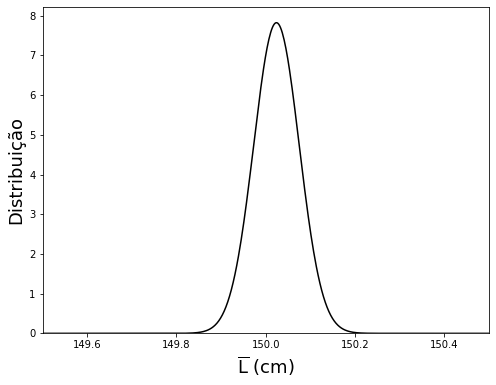

In [12]:
from scipy.stats import norm
rv = norm( loc=media_L, scale=erro_media_L )

fig = plt.figure( figsize=(8,6) )
x_min = 149.50
x_max = 150.50
X = np.linspace( x_min, x_max, 500 )

plt.plot( X, rv.pdf( X ), 'k-' )
plt.xlim( x_min, x_max )
plt.ylim( bottom=0. )
plt.xlabel( r"$\overline{\rm{L}}$ (cm)", fontsize=18 )
plt.ylabel( "Distribuição", fontsize=18 )

Text(0.0, 0.05, '$\\overline{\\rm{L}} \\pm 3\\sigma_{\\overline{\\rm{L}}} = (149.87,150.18)$ (cm)')

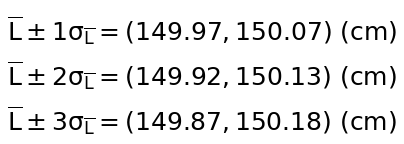

In [13]:
fig = plt.figure( figsize=(8,6) )

media_menos_1sigma = media_L - erro_media_L
media_mais_1sigma = media_L + erro_media_L
media_menos_2sigma = media_L - 2 * erro_media_L
media_mais_2sigma = media_L + 2 * erro_media_L
media_menos_3sigma = media_L - 3 * erro_media_L
media_mais_3sigma = media_L + 3 * erro_media_L

ax = plt.axes([0,0,0.3,0.3]) #left,bottom,width,height
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')

str_ = r"$\overline{\rm{L}} \pm 1\sigma_{\overline{\rm{L}}} = (%.2f,%.2f)$ (cm)" % ( np.round( media_menos_1sigma, 2 ), np.round( media_mais_1sigma, 2 ) )
ax.text(0., 0.75, str_, size=25)
str_ = r"$\overline{\rm{L}} \pm 2\sigma_{\overline{\rm{L}}} = (%.2f,%.2f)$ (cm)" % ( np.round( media_menos_2sigma, 2 ), np.round( media_mais_2sigma, 2 ) )
ax.text(0., 0.40, str_, size=25)
str_ = r"$\overline{\rm{L}} \pm 3\sigma_{\overline{\rm{L}}} = (%.2f,%.2f)$ (cm)" % ( np.round( media_menos_3sigma, 2 ), np.round( media_mais_3sigma, 2 ) )
ax.text(0., 0.05, str_, size=25)

Text(0, 0.5, 'Distribuição')

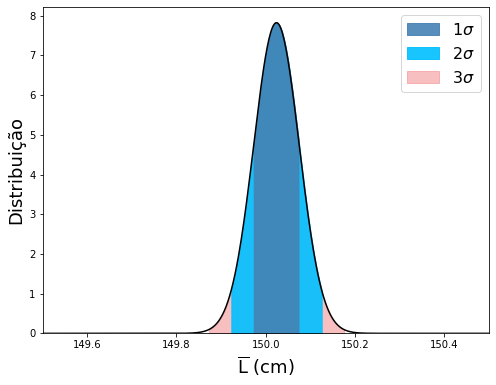

In [14]:
fig = plt.figure( figsize=(8,6) )
X_1sigma = X[ (X >= media_menos_1sigma) & (X <= media_mais_1sigma) ]
X_2sigma = X[ (X >= media_menos_2sigma) & (X <= media_mais_2sigma) ]
X_3sigma = X[ (X >= media_menos_3sigma) & (X <= media_mais_3sigma) ]

plt.plot( X, rv.pdf( X ), 'k-' )
# plt.fill( np.concatenate( ( [ X_3sigma[0] ], X_3sigma, [ X_3sigma[-1] ] ) ), np.concatenate( ( [ 0. ], rv.pdf( X_3sigma ), [ 0. ] ) ), color="lightcoral", alpha=0.75, label=r"$3\sigma$" )
# plt.fill( np.concatenate( ( [ X_2sigma[0] ], X_2sigma, [ X_2sigma[-1] ] ) ), np.concatenate( ( [ 0. ], rv.pdf( X_2sigma ), [ 0. ] ) ), color="deepskyblue", alpha=0.90, label=r"$2\sigma$" )
# plt.fill( np.concatenate( ( [ X_1sigma[0] ], X_1sigma, [ X_1sigma[-1] ] ) ), np.concatenate( ( [ 0. ], rv.pdf( X_1sigma ), [ 0. ] ) ), color="steelblue", alpha=0.75, label=r"$1\sigma$" )
plt.fill_between( X_3sigma, 0., rv.pdf( X_3sigma ), color="lightcoral", alpha=0.50, label=r"$3\sigma$" )
plt.fill_between( X_2sigma, 0., rv.pdf( X_2sigma ), color="deepskyblue", alpha=0.90, label=r"$2\sigma$" )
plt.fill_between( X_1sigma, 0., rv.pdf( X_1sigma ), color="steelblue", alpha=0.90, label=r"$1\sigma$" )
# plt.legend( loc='best', fontsize=16 )
handles, labels = plt.gca().get_legend_handles_labels()
order_ = [ 2, 1, 0 ]
handles_new = [ handles[idx_] for idx_ in order_ ]
labels_new = [ labels[idx_] for idx_ in order_ ]
#plt.legend( loc='best', fontsize=16 )
plt.legend( handles_new, labels_new, loc='best', fontsize=16 )

plt.xlim( x_min, x_max )
plt.ylim( bottom=0. )
plt.xlabel( r"$\overline{\rm{L}}$ (cm)", fontsize=18 )
plt.ylabel( "Distribuição", fontsize=18 )

In [15]:
rv.cdf( media_mais_1sigma ) - rv.cdf( media_menos_1sigma )

0.682689492137079

In [16]:
rv.cdf( media_mais_2sigma ) - rv.cdf( media_menos_2sigma )

0.9544997361036385

In [17]:
rv.cdf( media_mais_3sigma ) - rv.cdf( media_menos_3sigma )

0.9973002039367393